In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:

def str2float_list(str_list):
    return [float(e) for e in str_list.strip("[]").split(",")]

In [26]:

data_fp = "../../analysis/data/labeled_spend_01-08_2023_w_emb.txt"
emb_col = "descr_emb"
lab_col = "label"
delim = "|"
out_dir = "analysis/data"

# output path
base = Path(data_fp).name.split(".")[0]
out = Path(out_dir) / f"{base}_classd.csv"

# load data and prep embeddings
dat = pd.read_csv(data_fp, sep=delim, dtype=str)
dat[emb_col] = dat[emb_col].apply(str2float_list)

# label-index map
ltoi = {l: i for i, l in enumerate(dat[lab_col].unique())}
itol = {i: l for l, i in ltoi.items()}

# extract inputs and labels
X = np.array(dat[emb_col].to_list())
y = (dat[lab_col].map(ltoi).to_list())
labels = dat.descr.to_list()


A lot of the information provided by the embeddings seems to relate to the location name, so probably should remove that from the description before embedding.  

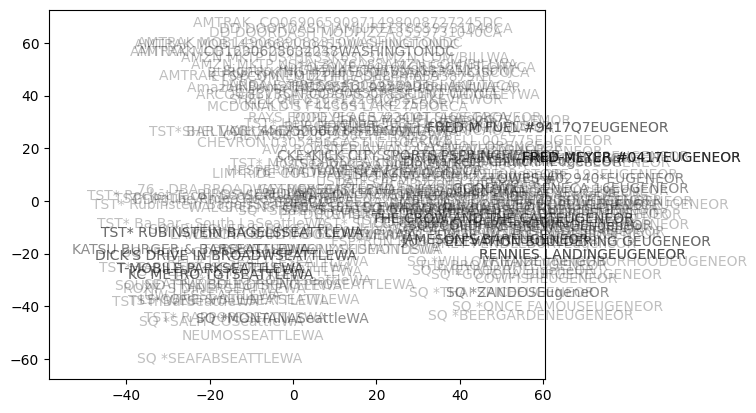

In [30]:
# pca
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)
Xpc = PCA(n_components=2).fit_transform(Xscaled)

fig, ax = plt.subplots()
ax.scatter(Xpc[:, 0], Xpc[:, 1], alpha=0)
for i, txt in enumerate(labels):
    ax.annotate(txt, (Xpc[i, 0], Xpc[i, 1]), alpha=0.25)


# plt.scatter(Xpc[:, 0], Xpc[:, 1])
# plt.xlabel("PC1")
# plt.ylabel("PC2")

Individual quadrants of the above plot

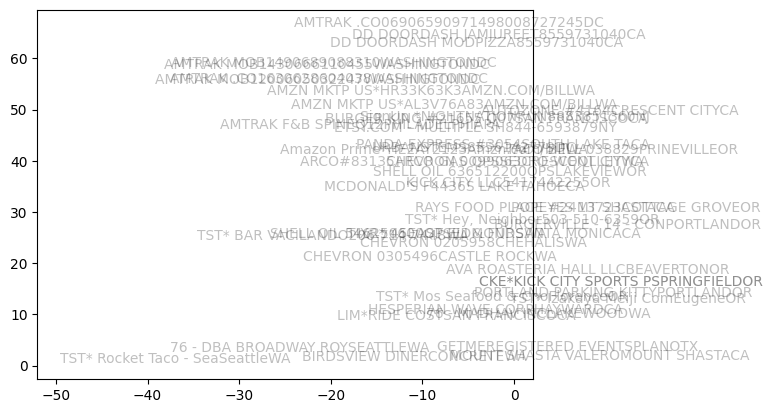

In [70]:
# top left quadrant
idx = np.where((Xpc[:, 0] < 0) & (Xpc[:, 1] > 0))[0]
Xpc2 = Xpc[idx]
labels2 = [labels[i.item()] for i in idx]
fig, ax = plt.subplots()
ax.scatter(Xpc2[:, 0], Xpc2[:, 1], alpha=0)
for i, txt in enumerate(labels2):
    ax.annotate(txt, (Xpc2[i, 0], Xpc2[i, 1]), alpha=0.25)

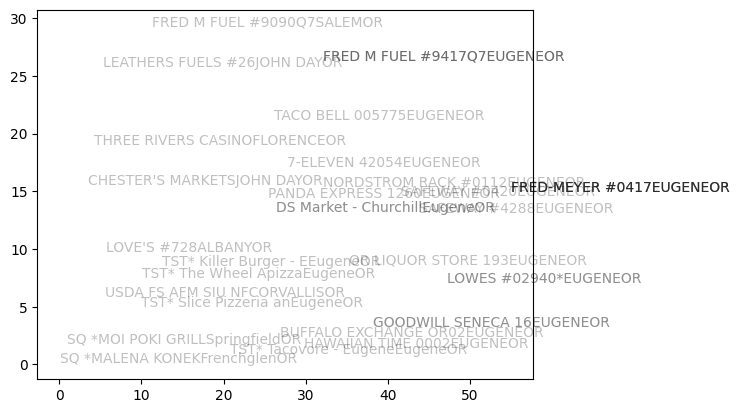

In [71]:
# top right quadrant
idx = np.where((Xpc[:, 0] > 0) & (Xpc[:, 1] > 0))[0]
Xpc2 = Xpc[idx]
labels2 = [labels[i.item()] for i in idx]
fig, ax = plt.subplots()
ax.scatter(Xpc2[:, 0], Xpc2[:, 1], alpha=0)
for i, txt in enumerate(labels2):
    ax.annotate(txt, (Xpc2[i, 0], Xpc2[i, 1]), alpha=0.25)

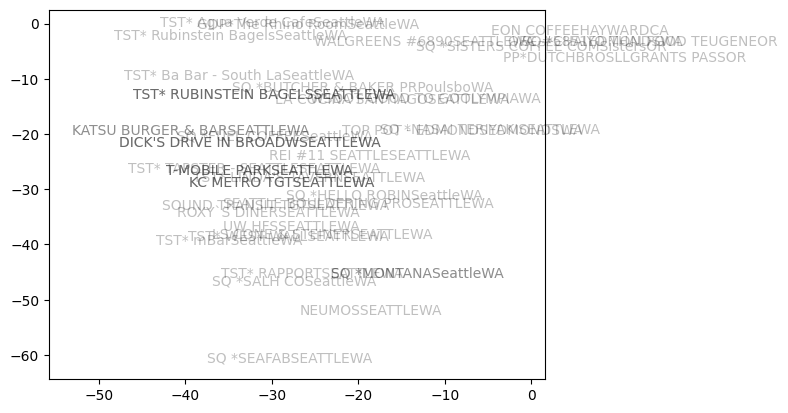

In [72]:
# bottom left quadrant
idx = np.where((Xpc[:, 0] < 0) & (Xpc[:, 1] < 0))[0]
Xpc2 = Xpc[idx]
labels2 = [labels[i.item()] for i in idx]
fig, ax = plt.subplots()
ax.scatter(Xpc2[:, 0], Xpc2[:, 1], alpha=0)
for i, txt in enumerate(labels2):
    ax.annotate(txt, (Xpc2[i, 0], Xpc2[i, 1]), alpha=0.25)

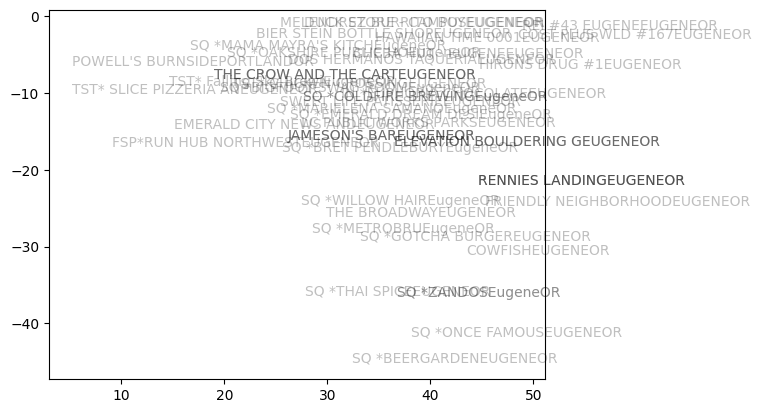

In [73]:
# bottom right quadrant
idx = np.where((Xpc[:, 0] > 0) & (Xpc[:, 1] < 0))[0]
Xpc2 = Xpc[idx]
labels2 = [labels[i.item()] for i in idx]
fig, ax = plt.subplots()
ax.scatter(Xpc2[:, 0], Xpc2[:, 1], alpha=0)
for i, txt in enumerate(labels2):
    ax.annotate(txt, (Xpc2[i, 0], Xpc2[i, 1]), alpha=0.25)